In [25]:
# get image
# turn image into array
from PIL import Image
import numpy as np
 
img = Image.open('image.png')
np_img = np.asarray(img)

print(np_img.shape)

(476, 640, 3)


In [26]:
# turn image array to gray scale
np_img_gs = np.mean(np_img, axis = 2, dtype = np.int64)
print(np_img_gs.shape) 
print(np_img_gs)
print("max value:",np_img_gs.max())
print("min value:",np_img_gs.min())

(476, 640)
[[244 244 244 ... 180 180 180]
 [244 244 244 ... 180 181 181]
 [244 244 244 ... 181 181 181]
 ...
 [ 83  83  84 ...  43  42  42]
 [ 73  78  82 ...  43  43  43]
 [ 71  74  77 ...  43  44  45]]
max value: 255
min value: 0


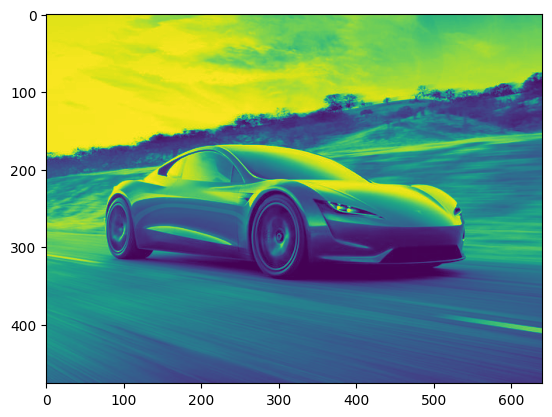

In [27]:
import matplotlib.pyplot as plt
plt.imshow(np_img_gs)

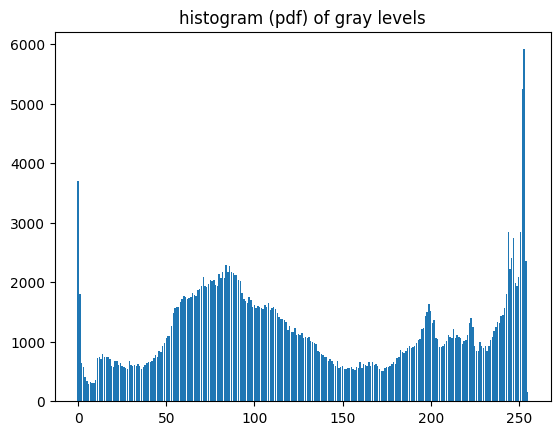

In [42]:
# estimate pdf of gray levels with histogram
hist = {value:0 for value in range(256)}
for value in np_img_gs.flatten():
    hist[value] += 1
plt.title("histogram (pdf) of gray levels", fontdict=None, loc='center')
plt.bar(list(hist.keys()), hist.values())
plt.show()

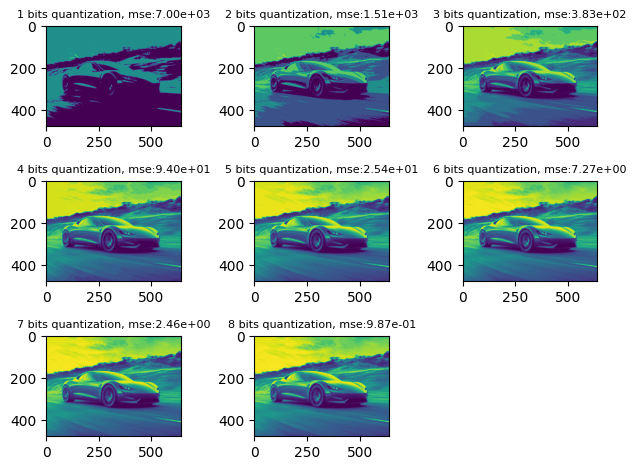

In [71]:
import matplotlib.pyplot as plt
img = np_img_gs
rows, cols = 3, 3

for b in range(1, 9):
    mse = 0
    plt.subplot(rows, cols, b)
    b_img = img
    for sep in range(2**b):
        b_img = np.where((b_img > 255 * (sep / 2**b)) & (b_img < 255 * ((sep + 1) / 2**b)), int(255 * (sep / 2**b)), b_img)
    mse = ((b_img - img)**2).mean()
    plt.title(f"{b} bits quantization, mse:{mse:.2e}", fontdict=None, loc='center', fontsize = 8)
    plt.imshow(b_img)

plt.tight_layout()
plt.show()